In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the image
image = cv2.imread('/content/drive/MyDrive/Visión Por computadora/SEM 7/MangoMass/images/101a.jpg')
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


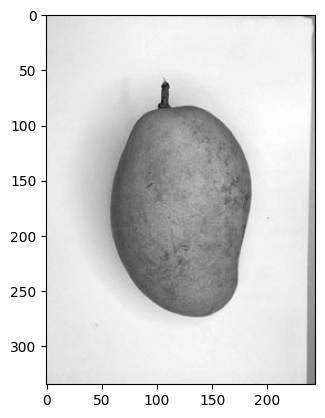

In [9]:
plt.imshow(gray, cmap='gray')

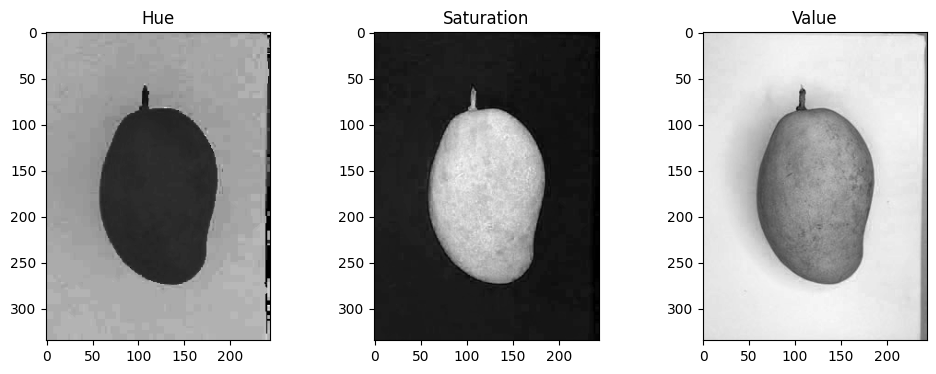

In [13]:

# Convert the image to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into its channels
h, s, v = cv2.split(hsv)

# Display the channels
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(h, cmap='gray')
plt.title('Hue')
plt.subplot(132)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.subplot(133)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.show()


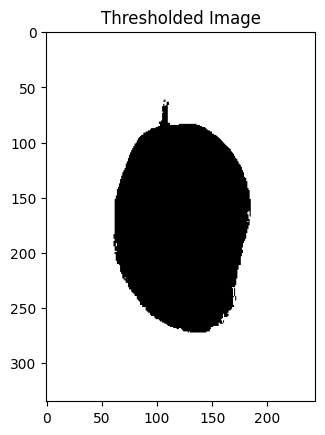

In [19]:
# prompt: NECESITO QUE SEGMENTES LA IMAGEN EN 0 Y 1 Y QUE 1 SEA 0 SEA EL FONDO

# Threshold the saturation channel to isolate the mango
ret, thresh = cv2.threshold(s, 100, 255, cv2.THRESH_BINARY)

# Invert the mask (now 1 is the mango and 0 is the background)
thresh = cv2.bitwise_not(thresh)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.show()


In [22]:
M = cv2.moments(thresh)
# Calculate the centroid coordinates
centroid_x = int(M["m10"] / M["m00"])
centroid_y = int(M["m01"] / M["m00"])
# Hu moments
# Calculate Hu Moments
hu = cv2.HuMoments(M)

In [23]:
hu

array([[1.08666224e-03],
       [1.05652817e-07],
       [1.45930820e-13],
       [1.35008908e-12],
       [5.81718001e-25],
       [4.33395069e-16],
       [1.43943699e-25]])